# Data Exploration
## Anscombe's Quartet
The following code is adapted from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [ ]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

In [ ]:
# look at mean, stdev, corr coeff
for label, (x,y) in datasets.items():
    print(f"Dataset {label}:")
    print(f"  Mean:  {np.mean(y):.2f}")
    print(f"  Stdev: {np.std(y):.2f}")
    print(f"  R^2: {np.corrcoef(x,y)[0][1]**2:.2f}")
    # print(f"  Min: {np.min(y):.2f}")
    # print(f"  Max: {np.max(y):.2f}")

In [ ]:

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

## Datasaurus Dozen
From https://www.research.autodesk.com/publications/same-stats-different-graphs/

In [ ]:
# load the dataset
dsd = pd.read_csv("DatasaurusDozen.tsv", sep="\t")
dsd.head()

In [ ]:
dsd.info()

In [ ]:
dsd["dataset"].value_counts()

In [ ]:
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10,8))

for ax, name in zip(axs.flat, dsd["dataset"].unique()):
    slice = dsd.query("dataset == @name")
    ax.scatter(slice["x"], slice["y"])
    ax.set_title(name)

    print(f"Dataset {name}:")
    print(f"  Mean:  {np.mean(slice['y']):.2f}")
    print(f"  Stdev: {np.std(slice['y']):.2f}")
    print(f"  R^2: {np.corrcoef(slice['x'],slice['y'])[0][1]**2:.2f}")

# A more useful example
Let's use Kaggle's [Titanic dataset](https://www.kaggle.com/competitions/titanic/data). Kaggle has already split the data into train/test, so we'll just load the training data and pretend that test doesn't exist.

Many public datasets are pre-split. This is so that you can replicate published results exactly. In other cases (like Kaggle competitions), a final test set is kept secret, ensuring things really can't leak.

In [2]:
td = pd.read_csv("titanic_train.csv")

In [5]:
# info, describe, head
td.info()
td.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Do more women survive than men? "Women and children first"
td[["Sex", "Survived"]].groupby("Sex").value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

Yes, looks like sex is related to survival.

Text(0, 0.5, '# of people')

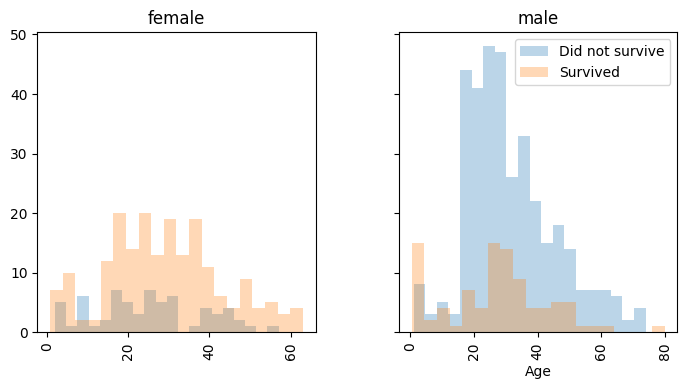

In [10]:
# What about the relationship between age and survival?
ax = td[td["Survived"] == 0].hist(by="Sex", column="Age", figsize=(8,4), alpha=0.3, label="Did not survive", sharey=True, bins=20)
td[td["Survived"] == 1].hist(ax=ax, by="Sex", column="Age", figsize=(8,4), alpha=0.3, label="Survived", bins=20)
plt.legend()
plt.xlabel("Age")
plt.ylabel("# of people")

Looks like sex is still the most important, but also children for male.

Survived    Axes(0.125,0.11;0.775x0.77)
dtype: object

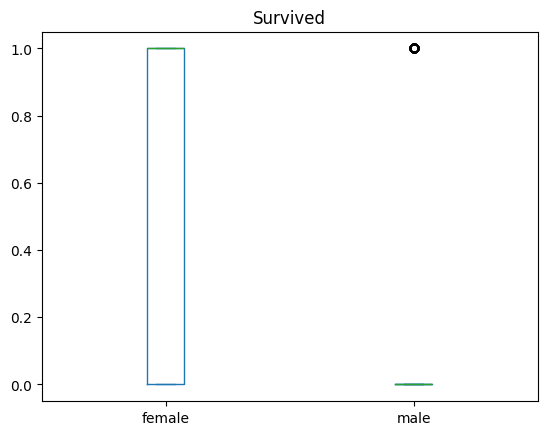

In [12]:
td.plot.box(column="Survived", by="Sex")

<Axes: xlabel='Age', ylabel='Fare'>

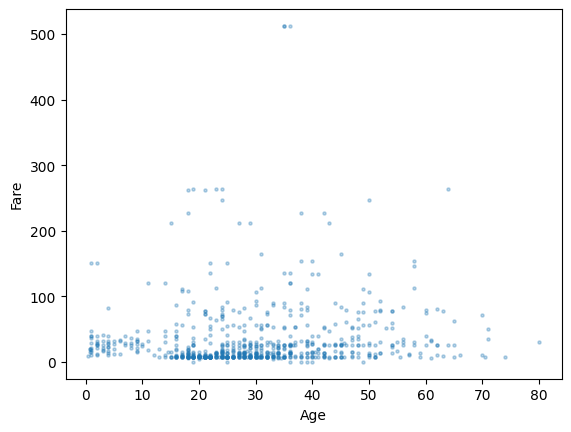

In [18]:
# is there a relationship between fare and age?
td.plot.scatter(x="Age", y="Fare", alpha=0.3, marker='.')

## Splitting the data

In [ ]:
# Splitting the data - random sample
# at minimum, needs random sample for consistency
td_train, td_test = train_test_split(td, test_size=0.2, random_state=1234)

In [22]:
print(td_train["Sex"].value_counts() / len(td_train))
print(td_test["Sex"].value_counts() / len(td_test))

Sex
male      0.640449
female    0.359551
Name: count, dtype: float64
Sex
male      0.675978
female    0.324022
Name: count, dtype: float64


In [24]:
# Splitting the data - stratified sample
# Want to make sure equal ratios of sex in train and test
td_train, td_test = train_test_split(td, test_size=0.2, random_state=1234, stratify=td["Sex"])
print(td_train["Sex"].value_counts() / len(td_train))
print(td_test["Sex"].value_counts() / len(td_test))


Sex
male      0.647472
female    0.352528
Name: count, dtype: float64
Sex
male      0.648045
female    0.351955
Name: count, dtype: float64


In [48]:
# Splitting the data - hashing to prevent changes
from zlib import crc32

# Passenger ID should be a unique identifier, but let's double check
print("Unique identifier:", td["PassengerId"].is_unique)

h_train_ids = td["PassengerId"].apply(lambda n: crc32(str(n).encode())) < 0.8 * 2**32
h_test_ids = np.ones_like(td["PassengerId"].values, dtype=bool)
h_test_ids[h_train_ids] = 0

print(f"Training fraction: {h_train_ids.sum() / len(td)}")
print(f"Testing fraction: {h_test_ids.sum() / len(td)}")

Unique identifier: True
Training fraction: 0.8047138047138047
Testing fraction: 0.19528619528619529


<Axes: xlabel='Age', ylabel='Fare'>

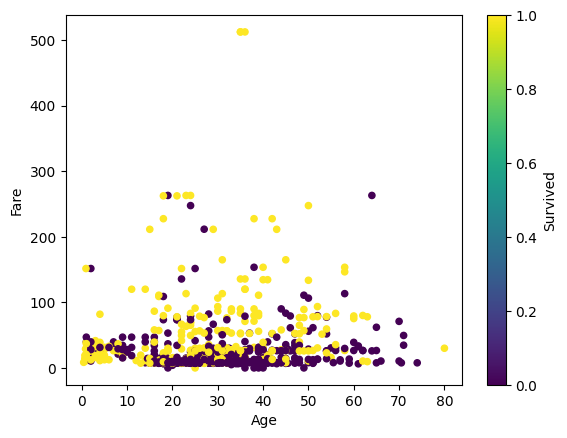

In [ ]:
# scatter plots
# Is there a relationship between age/fare and survival?
td.plot.scatter(x="Age", y="Fare", c="Survived", cmap="viridis")

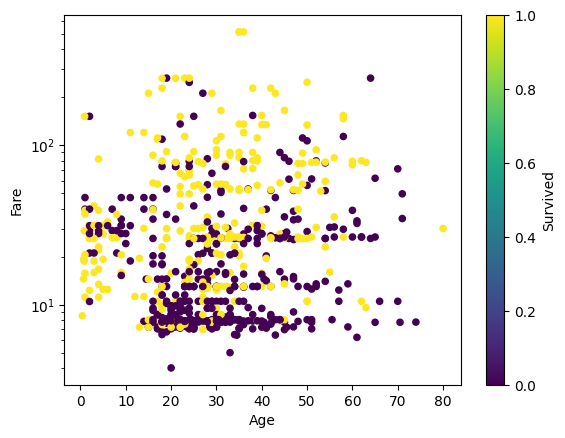

In [50]:
# maybe a log scale would help?
ax = td.plot.scatter(x="Age", y="Fare", c="Survived", cmap="viridis")
ax.set_yscale("log")

Those young folk in cheap seats didn't do so well.

In [ ]:
# box plots
td.plot.box(by="Survived", layout=(2,3), figsize=(10,8))

## Extra plots
Small examples that don't really fit with the main flow.

A brief example of sampling bias

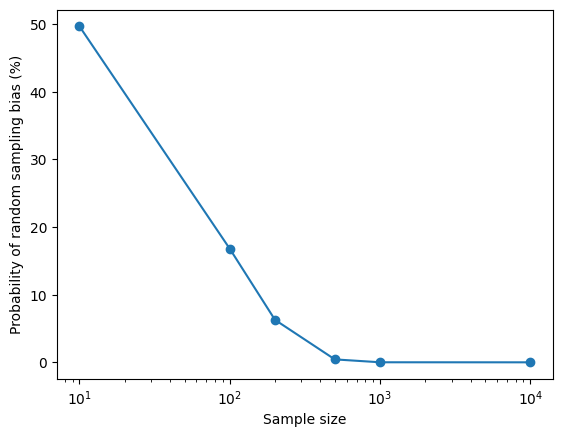

Sample size 10: Bias = 49.66835200000001
Sample size 100: Bias = 16.791910578162415
Sample size 200: Bias = 6.277334984862221
Sample size 500: Bias = 0.4342163447314419
Sample size 1000: Bias = 0.006903606882211153
Sample size 10000: Bias = 2.3905084619399127e-32


In [21]:
from scipy.stats import binom
import matplotlib.pyplot as plt

p = 0.8 # ratio of likes cilantro to dislikes cilantro
buffer = 0.05 # plus/minus 5%
sample_sizes = [10, 100, 200, 500, 1000, 10000]
prob_bias = []

for n in sample_sizes:
    too_small = n * (p - buffer)
    too_large = n * (p + buffer)
    proba_too_small = binom(n, p).cdf(too_small - 1)
    proba_too_large = 1 - binom(n, p).cdf(too_large)
    prob_bias.append((proba_too_small + proba_too_large) * 100)

plt.plot(sample_sizes, prob_bias, "o-")
plt.xlabel("Sample size")
plt.ylabel("Probability of random sampling bias (%)")
plt.xscale("log")
plt.show()

for n, b in zip(sample_sizes, prob_bias):
    print(f"Sample size {n}: Bias = {b}")

Train: [10 11  9  6  8  3  0  4]
Test:  [1 2 5 7]


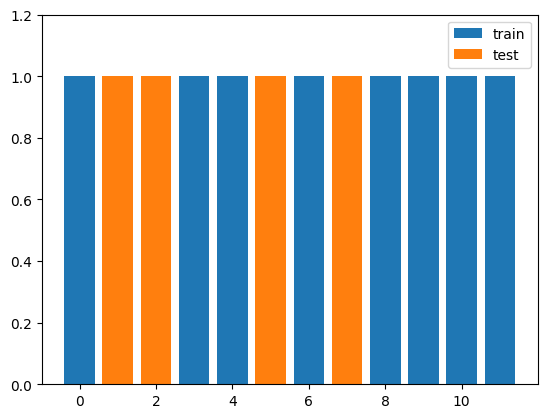

In [43]:
# create random number generator
rng = np.random.default_rng(seed=42)

ids = np.arange(12)
train = rng.choice(ids, 8, replace=False)
test = np.delete(ids, train)

print("Train:", train)
print("Test: ", test)

plt.bar(train, np.ones_like(train), label="train")
plt.bar(test, np.ones_like(test), label="test")
plt.ylim([0,1.2])
plt.legend()

[1696784233 2844319735  654825492 3954038922 3781742995  767742221
 2739787502 1877464688 3066545372 2054014018 4108501921  944292671
  848153126 4264020664 1890110811 3154300357  429518402 3576950492
 1539107135 2534861217]
Train: [ 0  1  2  5  6  7  8  9 11 12 14 15 16 18 19]
Test:  [ 3  4 10 13 17]


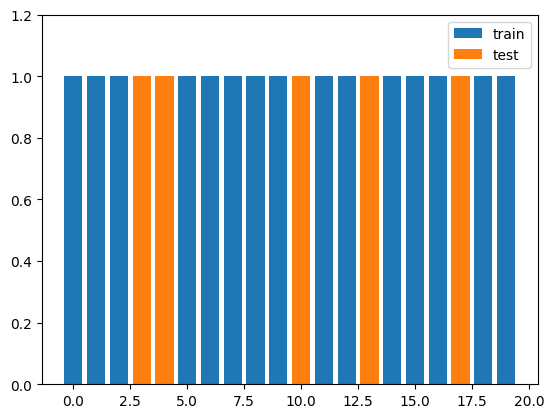

In [47]:
# deterministic approach: hashing
from zlib import crc32

# 80% of the maximum possible 32-bit hash value
test_thresh = 0.8 * 2**32

ids = np.arange(20)
hash_vals = np.array([crc32(id) for id in ids])
train = ids[hash_vals < test_thresh]
test = np.delete(ids, train)

print(hash_vals)
print("Train:", train)
print("Test: ", test)

plt.bar(train, np.ones_like(train), label="train")
plt.bar(test, np.ones_like(test), label="test")
plt.ylim([0,1.2])
plt.legend()